### Missing value feature engineering

Feature Engineering 
     1.1 Handeling missing values
        why there is missing value ?-- survey -- dipression survey
                 1. They hesitate to put down the information
                 2. Survey information are not valid
                 3. men --- salary
                 4. women---age
                 5. people may have died
                    

### What are the different types of missing data?

##### 1. Missing completely at random (MCAR)
There is absolutely no relationship betwwen the datamissing and any other values, observed or missing in the data set.

##### 2. Missing data not at random
Systematic missing value. There is some relationship between data missing and the data.

##### 3. Misiing at random (MAR)
men --- hiding salary
women---hiding age



#### Data that will be missing --

1. continous data
2. Categorical data

In [1]:

import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('titanic_train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
## Age and Cabin are not a type of missing completely random.

##### MCAR

In [12]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
## Embarked is a example of missing completely at random. 
## As there is no relationship between embarked and other values

##### MNAR

In [18]:
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

## percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [21]:
df.groupby(['Survived'])['cabin_null'].mean()

#comparing survived people whose  cabin is null
# The below data shows the the relationship survived people and cabin 
# missing value

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

## All the techniques of handling missing values

1. Mean/Mean/Mode replacement
2. Random Sample Inputation
3. Capturing NaN values with new feature
4. End of distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


## 1. Continuous Data

### 1.1  Mean/Median/Mode imputation
When should we apply:
Mean/Median imputation has the assumption that the data are Missing Compltely At Random (MCAR).

Solve this by replacing the Nan with most frequent occerance of variables.

In [24]:
df= pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
### mean of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [43]:
## Create a function for the the mode median mean imputation

def impute_nan(df,variable,median):
    df[variable + '_median']=df[variable].fillna(median)

In [44]:
median = df.Age.median()
median

28.0

In [45]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [46]:
## check sd of age and age_median

print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

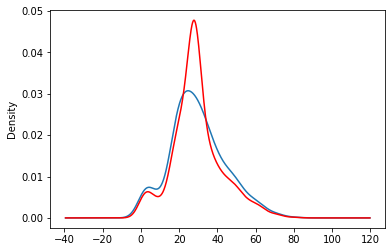

In [51]:
fig=plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)    #kernel density estimators
df.Age_median.plot(kind='kde',ax=ax,color='red')

#### Advantages and disadvantages of mea/median imputation

##### Advantages
1. Easy to implement (Robust to outliers)
2. Faster way to obtain complete data set

#### Disadvantages
1. Distortion in the original variance
2. Impact correlation

### 1.2 Random Sample Imputation

Aim: Random sample imputation consist of taking random observation from the data set and we use this observation to replace the nan values.

When should it be used?
It assumes that the data are Missing Completely At Random.(MCAR)

In [53]:
df= pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [54]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [56]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [69]:
df['Age'].isnull().sum()   ## add this in the sample()

177

In [68]:
#pickiing any random value and replacing all 177 nan values with sampled value

df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [70]:
## replace nan values with random and comparing with median/mean imputation

def impute_nan(df,variable,median):
    df[variable + '_median']=df[variable].fillna(median)
    df[variable + '_random']=df[variable]
    
    #random sample to fill the nan
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    ## pandas need to have same index to merge the data set
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [71]:
median=df.Age.median()

In [72]:
impute_nan(df,'Age',median)

In [73]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


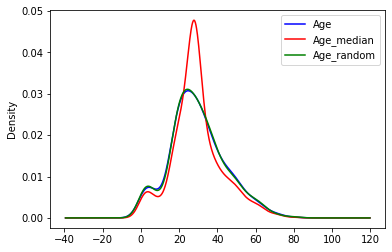

In [83]:
fig=plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='blue')    #kernel density estimators
df.Age_median.plot(kind='kde',ax=ax,color='red')
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines, labels =ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


In [78]:
### random Distribution is way more similar than median

#### Advantages and disadvantages of Random imputation

##### Advantages
1. Easy to implement.
2. Less distortion in variance

#### Disadvantages
1. Every situation randomness wont work.

### 1.3 Capturing NaN values with new feature

It works well if the data are Not Missing At Random (MNAR).

In [86]:
df= pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [87]:
#value present =0 nan value=1

df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [88]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


#### Advantages and disadvantages 

##### Advantages
1. Easy to implement.
2. Capture the importance of missing values

#### Disadvantages
1. Creating additional Features

### 1.4 End of distribution imputation 

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

In [118]:
df= pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


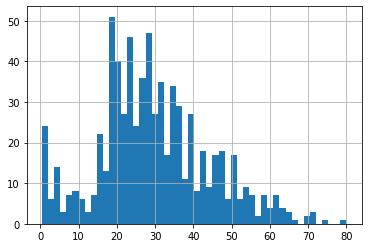

In [119]:
df.Age.hist(bins=50)

In [120]:
### take far end of distribution after 3 st. deviation

xtreme=df.Age.mean()+3*df.Age.std()
xtreme


73.27860964406095

In [3]:
import seaborn as sns
sns.boxplot('Age',data=df)

NameError: name 'df' is not defined

In [122]:
def impute_nan(df,variable,xtreme):
    df[variable+'_end']=df[variable].fillna(xtreme)
    df[variable].fillna(median,inplace=True)

In [123]:
impute_nan(df,'Age',xtreme)

In [131]:
df.head(5)

,Survived,Age,Fare,Age_end
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


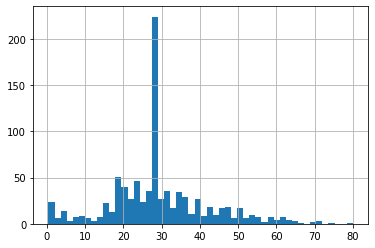

In [125]:
df['Age'].hist(bins=50)

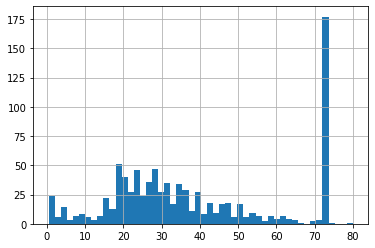

In [126]:
df['Age_end'].hist(bins=50)

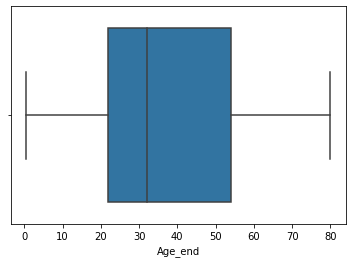

In [127]:
sns.boxplot('Age_end',data=df) ##### No outliers

#### Advantages and disadvantages 

##### Advantages
1. Easy to implement.
2. Capture the importance of missing values

#### Disadvantages
1. ditorts the original distribution of the variables.
2. it may mask the predictive power of the original variable
3. if number of na is big it will mask true outliers in the distribution


### 1.5 Arbitrary imputation
It consist of replacing NaN VALUES by an arbitrary value.
for each feature it is taken as unique way mainly the value of     outlier(least or max)
1. It should not be frequntly present

In [12]:
df= pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
def impute_nan(df,variable):
     df[variable+'_zero']=df[variable].fillna(0)
     df[variable+'_hund']=df[variable].fillna(100)
    

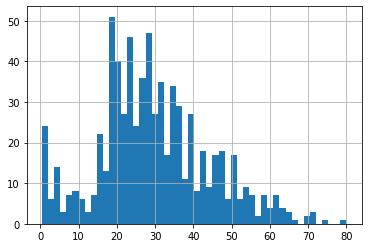

In [14]:
df['Age'].hist(bins=50)

#### Advantages and disadvantages 

##### Advantages
1. Easy to implement.
2. Capture the importance of missing values

#### Disadvantages
1. ditorts the original distribution of the variables.
2. if missings is not important it may mask the predictive power of original varaible by didtorting 
3. Hard to decide which value to be used.

## Categorical Data